In [1]:
using PyPlot

# (optional) change to a cool plot style. 
# see here for options: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("bmh")

# finite difference methods

the following dynamic model governs the liquid level $h(t)$ in a cylindrical tank, where $R$ is the resistance of the exit line, $A$ is the cross-sectional area of the tank, $q_i(t)$ is the volumetric flow rate of water into the tank, and $h_0$ is the initial liquid level.

\begin{align}
& A\frac{dh}{dt} = q_i - h / R \\
& h(t=0)=h_0
\end{align}

<img src="https://raw.githubusercontent.com/SimonEnsemble/control_theory_demos/master/studios/tank_diagram.png" width=450>

the area $A$ and resistance of the exit line $R$ are provided in the code cell below.

In [2]:
A = 2.0 # m²
R = 0.5 # min / m². intuitive that we see units of area here: friction of fluid with the *walls* of the pipe!

0.5

consider a situation where the process was operating at steady state before $t=0$, with $q_i=5$ m$^3$/min.

but, at $t=0^+$, the inlet flow is suddenly shut off, indefinitely. 

then, the tank will autonomously empty of liquid. let's write our own code to numerically approximate the solution to the ODE in this scenario, via the forward Euler method.

(1) determine the initial condition $h_0$ in this scenario. declare it as a variable `h₀`.

In [3]:
qᵢ₀ = 5.0 # m³ / min
h₀ = qᵢ₀ * R

2.5

(2) in Julia, write a function `f(h, t)`, with the view that:

$\dfrac{dh}{dt} = f(h, t)$.

remember, we are simulating the process for $t\geq 0$, so there is no flow of liquid *into* the tank.

In [4]:
f(h, t) = - h / (A * R)

f (generic function with 1 method)

(3) to set up our finite difference approximation, define the time step `Δt` to be 0.1 min.

we wish to simulate the process in the time interval $t \in [0, 5]$ min. define a variable `tf` to be the final time, with the value of 5.

with this in mind, also define `N`, the number of time steps we should take. write `N` in terms of `Δt` and `tf` so that we can change the time step later and automatically update `N`. make sure it is an integer by casting it as an `Int`, e.g. `Int(5.0)` will give `5`.

In [18]:
Δt = 0.1 # min
tf = 5.0 # min
N = Int(tf / Δt)

50

(4) we will store the times $t_i$'s in an array `t`. define this array, with element $i$ as $t_i= \Delta t (i-1)$ for $i \in {1, ..., N+1}$. we go up to $N+1$ because the first element of `t` should be zero. the last entry of the `t` array should be 5.0.

In [19]:
t = [Δt * (i - 1) for i = 1:N+1];
@show t;

t = [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0]


(5) we will store the approximations to the solution, $h_i \approx h(t_i)$'s in an array `h`. pre-allocate this array with zeros, of the appropriate size to correspond to `t`, so $N+1$ elements. we'll overwrite these zeros later.

in the first element of `h`, overwrite the zero with the initial condition, `h₀`.

In [22]:
h = zeros(N+1)
h[1] = h₀
@show h;

h = [2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


(6) now implement the forward Euler method to approximate the solution to this ODE. March ahead in time for `N` steps, via a `for` loop. you should use all of the following that you defined earlier:
* the `h` array
* the `t` array
* `Δt`
* `f(h, t)`

In [23]:
for i = 1:N # N time steps
    h[i+1] = h[i] + Δt * f(h[i], t[i])
end
@show h;

h = [2.5, 2.25, 2.025, 1.8224999999999998, 1.6402499999999998, 1.476225, 1.3286025, 1.19574225, 1.0761680249999999, 0.9685512224999999, 0.8716961002499999, 0.7845264902249999, 0.7060738412024998, 0.6354664570822498, 0.5719198113740248, 0.5147278302366223, 0.46325504721296007, 0.41692954249166403, 0.3752365882424976, 0.3377129294182478, 0.303941636476423, 0.2735474728287807, 0.24619272554590266, 0.2215734529913124, 0.19941610769218115, 0.17947449692296302, 0.16152704723066671, 0.14537434250760004, 0.13083690825684002, 0.11775321743115602, 0.10597789568804042, 0.09538010611923638, 0.08584209550731274, 0.07725788595658147, 0.06953209736092332, 0.06257888762483099, 0.05632099886234789, 0.0506888989761131, 0.04562000907850179, 0.04105800817065161, 0.03695220735358645, 0.033256986618227805, 0.029931287956405025, 0.026938159160764523, 0.02424434324468807, 0.02181990892021926, 0.019637918028197334, 0.0176741262253776, 0.01590671360283984, 0.014316042242555855, 0.012884438018300269]


(7) plot your numerical solution $h(t)$, via plotting `h` vs `t`.

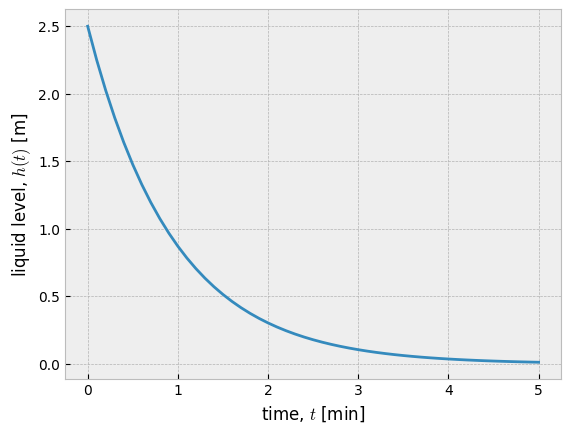

PyObject Text(32.71875, 0.5, 'liquid level, $h(t)$ [m]')

In [24]:
figure()
plot(t, h)
xlabel(L"time, $t$ [min]")
ylabel(L"liquid level, $h(t)$ [m]")

(8) the exact solution is $h(t)= h_0 e^{- t / (AR)}$. now plot your approximate solution vs. the exact solution to see if you implemented the forward Euler method correctly. use a legend to indicate which curve is exact and which is the approximate solution.

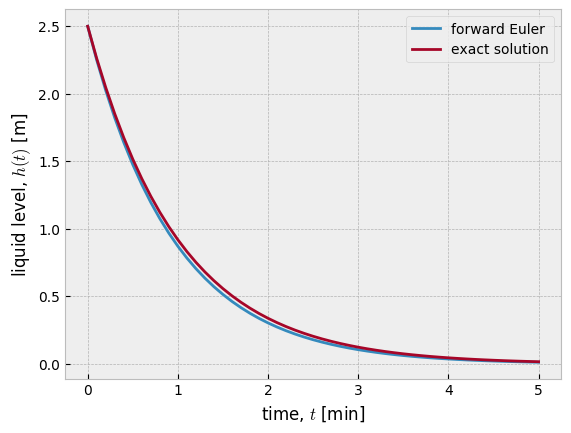

PyObject <matplotlib.legend.Legend object at 0x7ff4746dc7f0>

In [25]:
figure()
plot(t, h, label="forward Euler")
plot(t, h₀ * exp.(-t / (A * R)), label="exact solution")
xlabel(L"time, $t$ [min]")
ylabel(L"liquid level, $h(t)$ [m]")
legend()

(9) was your time step small enough? make the time step smaller, say 0.01 min, and re-run your notebook to see what happens.

$\Delta t$ is not sufficiently small because our approximate solution differs signifiantly from the exact solution.

# practice tank problem

Liquid continuously flows into a truncated square pyramidal tank at a rate $q_i=q_i(t)$ [m$^3$/s]. Hydrostatic pressure drives flow out of the tank through a narrow pipe at its base; via Bernoulli’s equation, the outlet flow rate $q \sim c \sqrt{h}$, where $h=h(t)$ [m] is the liquid level in the tank.
 
<img src="https://simonensemble.github.io/images/tank_problem/tank_1.png" width=500>

The view of the tank from all four sides is equivalent and is below. Its height is $H$ [m]. The top and bottom base are of length $L_t$ and $L_b$ [m], respectively. All horizontal slices through the tank reveal a square cross-section. This is a right pyramid, meaning that its apex (if it weren’t truncated) is directly above the centroid of its base.

<img src="https://simonensemble.github.io/images/tank_problem/tank_3.png" width=300>

Derive a dynamic model for the liquid level $h=h(t)$ given any input $q_i(t)$. Hint: find two triangles, four similar triangles.

I thought this tank problem was so fun that I wrote a blog post about it last year. see [here](https://simonensemble.github.io/2019-03-22-tank-problem/)